# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [211]:
'''pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  '''
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [212]:
sinasc_raw.dtypes

,0
ORIGEM,int64
CODESTAB,float64
CODMUNNASC,int64
LOCNASC,int64
IDADEMAE,int64
...,...
munResUf,object
munResLat,float64
munResLon,float64
munResAlt,float64


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [213]:
sinasc_1 = sinasc_raw[['ESCMAEAGR1', 'SEMAGESTAC']]
sinasc_1

,ESCMAEAGR1,SEMAGESTAC
0,12.0,39.0
1,12.0,38.0
2,12.0,40.0
3,8.0,38.0
4,12.0,38.0
...,...,...
27023,8.0,33.0
27024,5.0,39.0
27025,6.0,39.0
27026,6.0,35.0


In [214]:
lat_div = pd.cut(sinasc_raw['munResLat'], [-13.4, -10.5 ,0])
lat_div

,munResLat
0,"(-13.4, -10.5]"
1,"(-13.4, -10.5]"
2,"(-13.4, -10.5]"
3,"(-13.4, -10.5]"
4,"(-13.4, -10.5]"
...,...
27023,"(-13.4, -10.5]"
27024,"(-13.4, -10.5]"
27025,"(-13.4, -10.5]"
27026,"(-13.4, -10.5]"


In [224]:
sinasc_1.groupby([lat_div], observed=True).agg(['sum','mean','min','max','median','std'])

ESCMAEAGR1                                       SEMAGESTAC  \
                      sum      mean  min   max median       std        sum   
munResLat                                                                    
(-13.4, -10.5]    76774.0  5.995627  0.0  12.0    6.0  2.307502   478033.0   
(-10.5, 0.0]     110896.0  8.005197  0.0  12.0    8.0  3.389032   511951.0   

                                                        
                     mean   min   max median       std  
munResLat                                               
(-13.4, -10.5]  38.541724  19.0  45.0   39.0  2.016285  
(-10.5, 0.0]    38.588302  21.0  45.0   39.0  2.020722

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_2 = sinasc_raw[['ESCMAEAGR1', 'SEMAGESTAC']]

In [8]:
area_div = pd.cut(sinasc_raw['munResArea'],[0,3000,34096])

In [225]:
sinasc_2.groupby(area_div, observed=False).agg(['sum','mean','min','max','median','std'])

ESCMAEAGR1                                       SEMAGESTAC  \
                     sum      mean  min   max median       std        sum   
munResArea                                                                  
(0, 3000]        35272.0  6.814529  0.0  12.0    6.0  2.847898   197469.0   
(3000, 34096]    88248.0  6.631698  0.0  12.0    6.0  2.874445   498200.0   

                                                       
                    mean   min   max median       std  
munResArea                                             
(0, 3000]      38.470485  21.0  45.0   39.0  1.874927  
(3000, 34096]  38.611176  19.0  45.0   39.0  2.015062

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc_3 = sinasc_raw[['ESCMAEAGR1', 'SEMAGESTAC']]
alt_div = pd.qcut(sinasc_raw['munResAlt'],2)

In [226]:
sinasc_3.groupby(alt_div, observed=False).agg(['sum','mean','min','max','median','std'])

ESCMAEAGR1                                       SEMAGESTAC  \
                       sum      mean  min   max median       std        sum   
munResAlt                                                                     
(84.999, 153.0]   105993.0  7.877592  0.0  12.0    8.0  3.419479   493526.0   
(153.0, 595.0]     82384.0  6.183592  0.0  12.0    6.0  2.421674   501090.0   

                                                         
                      mean   min   max median       std  
munResAlt                                                
(84.999, 153.0]  38.568771  21.0  45.0   39.0  2.093561  
(153.0, 595.0]   38.566151  19.0  45.0   39.0  1.938267

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [12]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [17]:
sinasc = sinasc_raw[['IDADEMAE','munResNome']]

In [18]:
sinasc5 = sinasc.set_index('munResNome')

<Axes: xlabel='munResNome'>

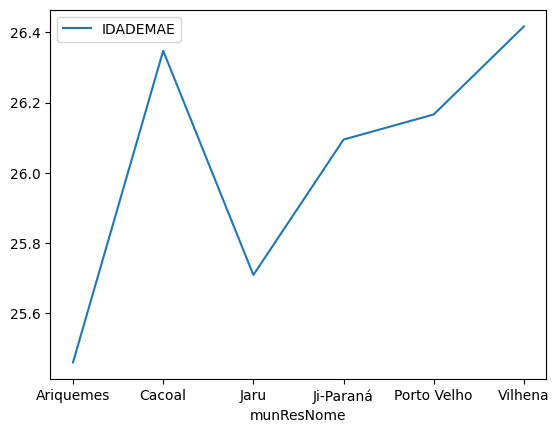

In [19]:
sinasc5.groupby(imediatas).mean().plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [24]:
tables = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M")
idh = tables[0]


In [ ]:
idh.columns = ['Posição', 'Município', 'IDH', 'IDH_Renda', 'IDH_Longevidade', 'IDH_Educação']
idh

In [29]:
idh = idh[['Posição', 'Município', 'IDH']].copy()
idh.head(1)

,Posição,Município,IDH
0,nenhum município,nenhum município,nenhum município


In [31]:
idh.loc[:, 'IDH'] = pd.to_numeric(idh['IDH'], errors='coerce')

In [32]:
idh.dropna(subset=['IDH'], inplace=True)

In [33]:
def categorize_idh(idh):
   if idh < 0.500:
       return "Muito Baixo"
   elif idh < 0.600:
       return "Baixo"
   elif idh < 0.700:
       return "Médio"
   elif idh < 0.800:
       return "Alto"
   else:
       return "Muito Alto"

In [35]:
idh.loc[:, 'Faixa_IDH'] = idh['IDH'].apply(categorize_idh)

In [42]:
idh_table_classificado = idh[['Município', 'IDH', 'Faixa_IDH']]

In [83]:
idh.groupby('Faixa_IDH').count()['Município']

,Município
Faixa_IDH,
Alto,7
Baixo,9
Médio,36


In [43]:
idh_table_classificado.head()

,Município,IDH,Faixa_IDH
2,Porto Velho,0.736,Alto
3,Vilhena,0.731,Alto
4,Cacoal,0.718,Alto
5,Ji-Paraná,0.714,Alto
6,Pimenta Bueno,0.71,Alto


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [166]:
tables = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM')
ifdm = tables[0]
ifdm.columns = ['Posição', 'Municipio', 'IFDM']
ifdm.loc[:, 'IFDM'] = pd.to_numeric(ifdm['IFDM'], errors='coerce')
ifdm.dropna(subset=['IFDM'], inplace=True)
ifdm

,Posição,Municipio,IFDM
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.685
9,8º,Rolim de Moura,0.6785
10,9º,Chupinguaia,0.6766
11,10º,São Miguel do Guaporé,0.6699


In [72]:
def categorize_ifdm(ifdm):
  if ifdm < 0.4:
    return 'Baixo'
  elif ifdm < 0.6:
    return 'Regular'
  elif ifdm < 0.8:
    return 'Moderado'
  else:
    return 'Alto'

In [73]:
ifdm['Faixa_IFDM'] = ifdm['IFDM'].apply(categorize_ifdm)

In [78]:
ifdm

,Posição,Municipio,IFDM,Faixa_IFDM
2,1º,Ariquemes,0.7746,Moderado
3,2º,Vilhena,0.7465,Moderado
4,3º,Pimenta Bueno,0.7383,Moderado
5,4º,Porto Velho,0.7257,Moderado
6,5º,Ji-Paraná,0.7117,Moderado
7,6º,Cacoal,0.7111,Moderado
8,7º,Santa Luzia d'Oeste,0.685,Moderado
9,8º,Rolim de Moura,0.6785,Moderado
10,9º,Chupinguaia,0.6766,Moderado
11,10º,São Miguel do Guaporé,0.6699,Moderado


In [81]:
ifdm_ = ifdm[['Municipio', 'IFDM', 'Faixa_IFDM']]

In [82]:
ifdm_.groupby('Faixa_IFDM')['Municipio'].count()

,Municipio
Faixa_IFDM,
Moderado,26
Regular,26


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [203]:
pib = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB')
pib = pd.concat([pib[0], pib[1], pib[2], pib[3], pib[4], pib[5]])
pib.columns = ['Posicao', 'Mudanca', 'Municipio', 'PIB', 'Alteracao', 'Poicao2', 'Mudanca']
pib = pib[['Municipio', 'PIB']].copy()
pib.reset_index(drop=True)

,Municipio,PIB
0,Porto Velho,17 912 070
1,Ji-Paraná,3 783 972
2,Vilhena,2 831 175
3,Ariquemes,2 579 830
4,Cacoal,2 261 644
5,Jaru,1 500 890
6,Rolim de Moura,1 283 434
7,Pimenta Bueno,1 164 877
8,Guajará-Mirim,893 000
9,Ouro Preto do Oeste,834 000


In [204]:
pib['PIB'] = pib['PIB'].apply(lambda x: x.replace(" ",""))


In [205]:
pib['PIB'] = pd.to_numeric(pib['PIB'], errors='coerce')

In [206]:
def categorize_pib(pib):
  if pib > 1000000:
    return 'Acima de 1 Bilhão'
  elif pib > 500000:
    return 'Acima de 500 Milhões'
  elif pib > 300000:
    return 'Acima de 300 Milhões'
  elif pib > 200000:
    return 'Acima de 200 Milhões'
  elif pib > 100000:
    return 'Acima de 100 Milhões'
  elif pib < 100000:
    return 'Abaixo de 100 Milhões'

In [207]:
pib['Faixa_PIB'] =  pib['PIB'].apply(categorize_pib)

In [208]:
pib

,Municipio,PIB,Faixa_PIB
0,Porto Velho,17912070,Acima de 1 Bilhão
1,Ji-Paraná,3783972,Acima de 1 Bilhão
2,Vilhena,2831175,Acima de 1 Bilhão
3,Ariquemes,2579830,Acima de 1 Bilhão
4,Cacoal,2261644,Acima de 1 Bilhão
5,Jaru,1500890,Acima de 1 Bilhão
6,Rolim de Moura,1283434,Acima de 1 Bilhão
7,Pimenta Bueno,1164877,Acima de 1 Bilhão
0,Guajará-Mirim,893000,Acima de 500 Milhões
1,Ouro Preto do Oeste,834000,Acima de 500 Milhões


In [202]:
pib.groupby('Faixa_PIB')['Municipio'].count()

,Municipio
Faixa_PIB,
Abaixo de 100 Milhões,8
Acima de 1 Bilhão,8
Acima de 100 Milhões,16
Acima de 200 Milhões,4
Acima de 300 Milhões,7
Acima de 500 Milhões,9


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Podemos observar que em cidades como Cacoal, Vilhena e Porto Velho, que são mais desenvolvidas e possuem os maiores PIBs e IDHs, as mulheres tendem a ter filhos em idades mais avançadas. Isso é evidenciado pelos dados combinados dos exercícios 4, 5.1 e 5.3.